# A Brief Review
Last week we discussed the atoms of computing from chapter 2. This looked deeper into the meaning behind binary values and where they show up when we work with quantum computing. We then took a look at quantum circuits and some of the common gates that make up the famous algorithms we will be looking into later. Finally, we created an adder circuit with qiskit to add two single digit binary values and return a 2 bit binary answer. 

*If you'd like a refresher, make sure to check out the github repository containing all of our lectures and review the Jupyter notebook there.*

# Chapter 3 - What is Quantum?
*Even though we already briefly discussed the Hadamard gate in the previous week, let's do a quick refresher since it is a primary topic for this chapter.*

**Does anybody remember what the Hadamard gate did when applied to a qubit?**

When we apply the Hadamard gate, we place the qubit in a superposition between 1 and 0. This means that when we measure this superposition, it is going to measure at a 1 or a 0 based on the probability. In this case, the Hadamard gate puts our qubit in a superposition so that half the time it measures as a 1 and the other half it measures at a 0. 

Remember that with qubits 1 and 0 are represented in Bra-Ket notation. So from now on when I speak about a qubit being measured at a 1 or 0, we will say $|1\rangle$ or $|0\rangle$.

![image](https://learn.qiskit.org/content/v2/intro/images/what-is/minicomposer/prob-0.svg)

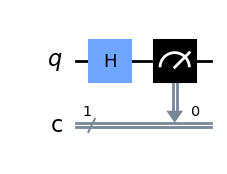

In [31]:
# import standard libraries
import qiskit
from qiskit.visualization import plot_bloch_multivector 
import numpy as np
import pylatexenc 
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute
from qiskit.visualization import plot_histogram
from qiskit.providers.aer import AerSimulator

# Create a Quantum Circuit
circuit = QuantumCircuit(1, 1)
circuit.h(0)
circuit.measure(0, 0)

# Display the Circuit
display(circuit.draw('mpl'))

{'1': 542, '0': 482}


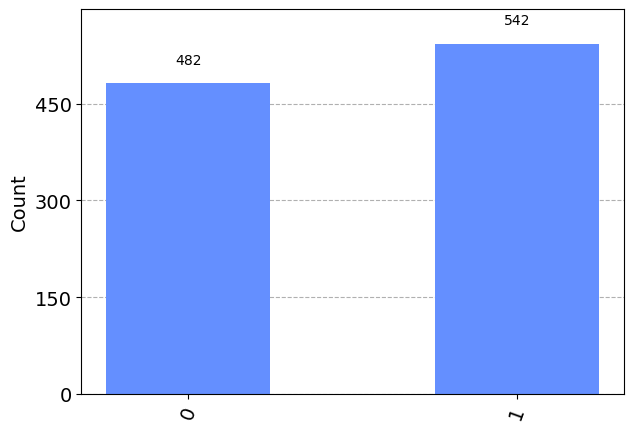

In [32]:
# simulate outputs
sim = AerSimulator()
compiled = transpile(circuit, sim)
job = assemble(compiled)

result = sim.run(compiled).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

As we can see, we are not getting a perfect distribution here. We won't always get a perfect distribution since qubits actually produce a truly random output. All other methods we use in classical computing are deterministic which means we can only produce pseudo random. Qubits are not, which means that there are no fundamental underlying variables that choose whether it returns the state $|0\rangle$ or $|1\rangle$. Qubits allow us to have truly random outputs. 

*Let's remove the gates on the current circuit and try out the Pauli-X gate, also known as the NOT operator or NOT gate.*

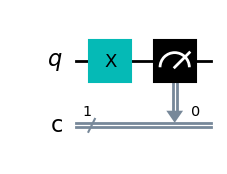

{'1': 1024}


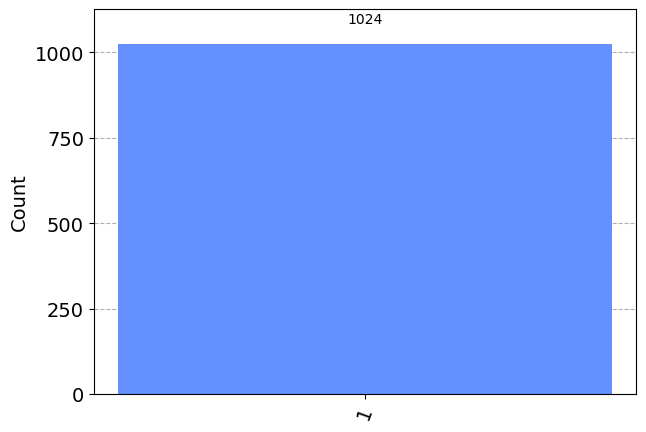

In [33]:
# Remove previous gates
circuit.data = []

# Add Pauli-X gate and measurement
circuit.x(0)
circuit.measure(0, 0)

# Display the Circuit
display(circuit.draw('mpl'))

# Graph the results
compiled = transpile(circuit, sim)
job = assemble(compiled)
result = sim.run(compiled).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

As we can see we have a 0% probability of getting the $|0\rangle$ state and 100% probability of getting the $|1\rangle$ state. This is because the initial state of the qubit is set to $|0\rangle$ and once the NOT gate is applied, it flips the bit to $|1\rangle$. 

**What do you think will happen when we apply a Hadamard gate after this X gate?**

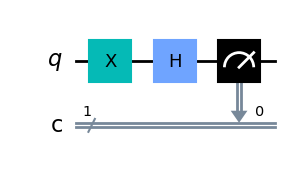

{'1': 518, '0': 506}


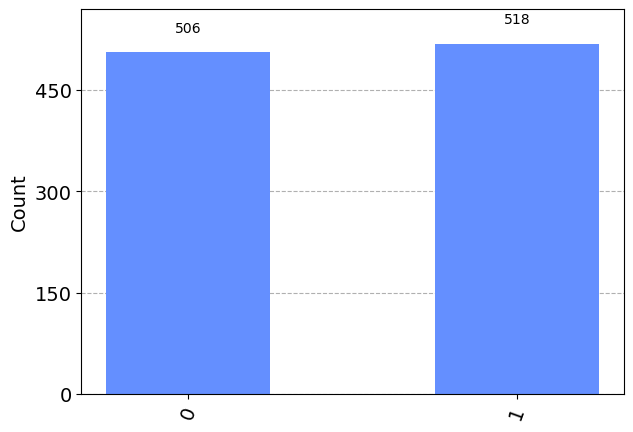

In [34]:
# Remove previous gates
circuit.data = []

# Add Pauli-X gate and measurement
circuit.x(0)
circuit.h(0)
circuit.measure(0, 0)

# Display the Circuit
display(circuit.draw('mpl'))

# Graph the results
compiled = transpile(circuit, sim)
job = assemble(compiled)
result = sim.run(compiled).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

As we can see, we get the exact same result as the previous Hadamard gate circuit that we made. So does this mean that the Hadamard gate can be treated as just a random number generator? Let's take a look by applying another Hadamard gate on top of it. If it is truly a random number gate, it will produce the similar distribution.

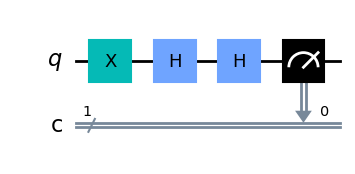

{'1': 1024}


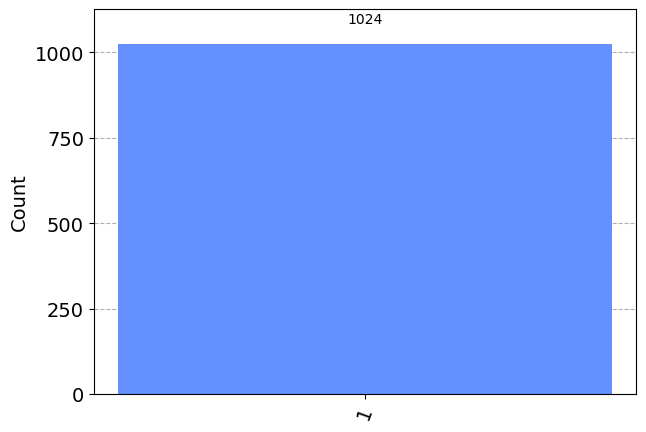

In [35]:
# Remove previous gates
circuit.data = []

# Add Pauli-X gate and measurement
circuit.x(0)
circuit.h(0)
circuit.h(0)
circuit.measure(0, 0)

# Display the Circuit
display(circuit.draw('mpl'))

# Graph the results
compiled = transpile(circuit, sim)
job = assemble(compiled)
result = sim.run(compiled).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

It looks like from this experiment we instead get a $|1\rangle$ state 100% of the time. This was the exact state we had before the 2 Hadamard gate we applied. Does this mean that it returns the qubit to it's original state? Let's try!

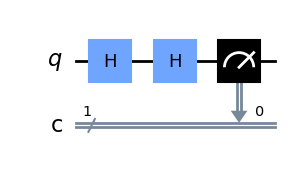

{'0': 1024}


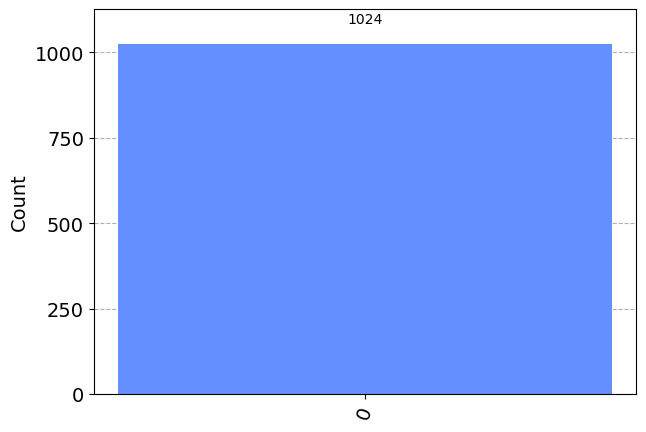

In [36]:
# Remove X gate
circuit.data.pop(0)

# Display the Circuit
display(circuit.draw('mpl'))

# Graph the results
compiled = transpile(circuit, sim)
job = assemble(compiled)
result = sim.run(compiled).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

It looks like our prediction was correct. It returns it back to its previous state. It seems that this Hadamard gate is not just a random number gate, but the qubit holds more information than that when passing through. It must contain a memory of it's previous state somehow so it can return to the original value.

As the Qiskit Textbook discussed, probabilities are a great way for us to define the chances of many possible outcomes. These apply very easily to the world around us, but once we are at the quantum level, these probabilities no longer hold up. We need a way to describe these quantum mechanical states. 

In quantum mechanics we will instead use probability amplitudes. From the Qiskit textbook, we see that these amplitudes are similar to probabilities where:
 - amplitudes have a magnitude
 - each possible outcome has a probability amplitude
 - the magnitude that outcome's amplitude tells us how likely that outcome will occur
 
This amplitude has both a magnitude (probability) and a direction, just like a vector (this gives you a little hint into the inevitable importance of linear algebra in quantum computing). 

So when we apply the Hadamard gate with this new amplitude notation, we get something like this.
![image](https://learn.qiskit.org/content/v2/intro/images/what-is/carousel/0/5.svg)

Notice how the magnitude of the state is negative when an H gate is applied to the $|1\rangle$ state. This must be the extra information that was contained in the quantum state that allowed it to return to its previous value after 2 Hadamard gates. This notation accurately represents the quantum state. 

Finally, to neaten things up as these trees become exponentially more complicated as the number of qubits increase. We have decided to use vectors to represent these states and matricies for transformations like the Hadamard gate.
![image](https://learn.qiskit.org/content/v2/intro/images/what-is/amp-vectors.svg)

## Conclusion
In this chapter we finally started messing around with qubits and quantum gates to start changing the states of these qubits. We also discovered a better notation to represent these quantum states with amplitudes. I highly recommend you check out the Qiskit Quantum Composer at the link below and start messing with the gates yourself. This will allow you to develop a bit of a intuition for the gates and the states they produce. 
https://quantum-computing.ibm.com/composer/